## Dividir el Dataset en conjunto de entrenamiento y testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\Datasets\datasets\ads\Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 5., 13., 13., 38., 50., 36., 21., 21.,  1.,  2.]),
 array([-2.47976125, -1.95075675, -1.42175224, -0.89274773, -0.36374323,
         0.16526128,  0.69426579,  1.2232703 ,  1.7522748 ,  2.28127931,
         2.81028382]),
 <a list of 10 Patch objects>)

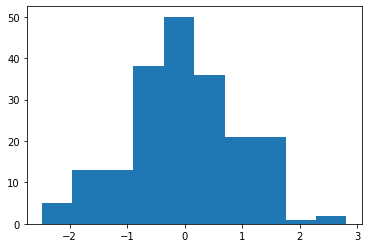

In [5]:
plt.hist(a)

In [9]:
import statsmodels.formula.api as smf

In [10]:
check = (a<0.8)
uncheck = (a>0.8)

In [11]:
training = data[check]
testing = data[uncheck]

In [12]:
len(training), len(testing)

(159, 41)

In [13]:
lm = smf.ols(formula = "Sales~TV + Radio", data=training).fit()

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     616.7
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           8.43e-75
Time:                        19:54:38   Log-Likelihood:                -313.67
No. Observations:                 159   AIC:                             633.3
Df Residuals:                     156   BIC:                             642.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8681      0.344      8.328      0.000       2.188       3.548
TV             0.0464      0.002     28.452      0.000       0.043       0.050
Radio          0.1844      0.009     19.575      0.000       0.166       0.203
==============================================================================
Omnibus:                       49.447   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.487
Skew:                          -1.355   Prob(JB):                     1.02e-24
Kurtosis:                       6.056   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.8681 + 0.0464 TV + 0.1844 * Radio

## Validacion del modelo con el conjunto de Testing

In [18]:
sales_pred = lm.predict(testing)
sales_pred

12     10.442950
14     18.398126
17     23.217884
18      9.856495
21     14.816966
33     18.871672
43     14.011038
54     20.359601
55     21.199007
57     12.723710
58     21.787701
60      5.717721
69     21.015053
70     17.742231
71     10.596117
87     15.486636
88     11.664012
94     10.429517
96     12.676398
97     15.313857
99     16.825538
101    23.305053
106     6.055413
108     3.549330
121     7.740609
122    13.697804
124    19.465343
127     6.587110
134    11.695692
146    15.347771
148    12.060120
152    16.326813
154    15.466771
161    13.442400
163    17.234465
180    10.609239
187    17.020967
188    18.693027
190    12.277169
191     8.360300
198    23.762375
dtype: float64

In [29]:
SSD = sum(testing["Sales"]-sales_pred)**2

In [30]:
RSE = np.sqrt(SSD/(len(testing)-3))

In [31]:
sales_mean= np.mean(testing["Sales"])

In [32]:
error_m = RSE/sales_mean

In [33]:
error_m

0.10275540515211408